# 개인과제-1: 트랜잭션 데이터로부터 직접 파생변수(feature) 만들기
- **Input**: transactions.csv (트랜잭션 형식의 판매 데이터)
- **Output**: features.csv (머신러닝 모델링이 가능한 형태의 고객 feature 데이터, 일명 *Customer Signature*)

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)

In [151]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [152]:
tr = pd.read_csv('transactions.csv', encoding='cp949')
tr

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000
...,...,...,...,...,...,...,...
231999,3499,2007-12-17 00:00:00,본 점,127129,상품군미지정,기타,-135000
232000,3499,2007-12-23 00:00:00,노원점,285136,시티웨어,시티웨어,6380000
232001,3499,2007-12-23 00:00:00,노원점,39107,야채,농산물,40800
232002,3499,2007-12-27 00:00:00,본 점,740120,어덜트,명품,4880000


새로 만든 feature와 병합할 고객ID로만 이루어진 데이터프레임을 만든다.

In [153]:
features = pd.DataFrame({'cust_id': tr.cust_id.unique()})
features

,cust_id
0,0
1,1
2,2
3,3
4,4
...,...
3495,3495
3496,3496
3497,3497
3498,3498


<br><font color='green'>
### 추가로 새로운 파생변수 제안

**[파생변수]** 평균구매상품수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [154]:
df = tr[tr.amount > 0].groupby(["cust_id", "goods_id"])["amount"].agg([("상품별구매수량", "count")]).reset_index()
new_feature = df.groupby(["cust_id"])["상품별구매수량"].agg([("평균구매상품수", "mean")])
new_feature = new_feature.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수
0,0,2.028571
1,1,1.000000
2,2,4.000000
3,3,1.833333
4,4,1.500000
...,...,...
3495,3495,2.000000
3496,3496,1.333333
3497,3497,1.000000
3498,3498,2.000000


**[파생변수]** 일평균구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [155]:
df = tr[tr.amount > 0].groupby(["cust_id", "tran_date"])["amount"].agg([("일별합계구매액", "sum")])
new_feature = df.groupby(["cust_id"])["일별합계구매액"].agg([("일평균구매액", "mean")])
new_feature = new_feature.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액
0,0,2.028571,4.174602e+06
1,1,1.000000,1.218000e+06
2,2,4.000000,1.598500e+06
3,3,1.833333,8.932011e+05
4,4,1.500000,1.452500e+07
...,...,...,...
3495,3495,2.000000,3.175200e+06
3496,3496,1.333333,5.096886e+06
3497,3497,1.000000,7.500000e+04
3498,3498,2.000000,9.375000e+05


**[파생변수]** 일평균구매건수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [156]:
df = tr[tr.amount > 0].groupby(["cust_id", "tran_date"])["cust_id"].agg([("일별합계구매건", "count")])
new_feature = df.groupby(["cust_id"])["일별합계구매건"].agg([("일평균구매건 ", "mean")])
new_feature = new_feature.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건
0,0,2.028571,4.174602e+06,3.944444
1,1,1.000000,1.218000e+06,1.000000
2,2,4.000000,1.598500e+06,2.000000
3,3,1.833333,8.932011e+05,2.444444
4,4,1.500000,1.452500e+07,1.500000
...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000
3496,3496,1.333333,5.096886e+06,1.714286
3497,3497,1.000000,7.500000e+04,1.000000
3498,3498,2.000000,9.375000e+05,1.000000


**[파생변수]** 최소구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [157]:
df = tr[tr.amount > 0].groupby("cust_id")["amount"].agg([("최소구매액", "min")])
new_feature = df.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액
0,0,2.028571,4.174602e+06,3.944444,1150.0
1,1,1.000000,1.218000e+06,1.000000,300000.0
2,2,4.000000,1.598500e+06,2.000000,64500.0
3,3,1.833333,8.932011e+05,2.444444,1800.0
4,4,1.500000,1.452500e+07,1.500000,2050000.0
...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0
3496,3496,1.333333,5.096886e+06,1.714286,2500.0
3497,3497,1.000000,7.500000e+04,1.000000,75000.0
3498,3498,2.000000,9.375000e+05,1.000000,875000.0


**[파생변수]** 중간구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [158]:
df = tr[tr.amount > 0].groupby("cust_id")["amount"].agg([("중간구매액", "median")])
new_feature = df.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0
...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0


**[파생변수]** 주거래지점의 거래수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [159]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["tmp"] = np.ones(len(tr_tmp))
main_tran_store = pd.pivot_table(tr_tmp, values="tmp", index="cust_id", columns="store_nm", aggfunc=sum, fill_value=0)
new_feature = main_tran_store.max(axis=1)
new_feature = new_feature.reset_index()
new_feature = new_feature.rename(columns={0 : "주거래지점거래수"})
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0
...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0


**[파생변수]** 월평균 구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [160]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_mean_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc=np.mean, fill_value=np.NaN)
new_feature = monthly_mean_tran.mean(axis=1)
new_feature = new_feature.reset_index()
new_feature = new_feature.rename(columns={0: "월평균구매금액"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06
...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05


**[파생변수]** 월평균 구매건수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [161]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_mean_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc="count", fill_value=np.NaN)
new_feature = monthly_mean_tran.mean(axis=1); new_feature
new_feature = new_feature.reset_index()
new_feature = new_feature.rename(columns={0: "월평균구매건수"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000
...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000


**[파생변수]** 거래 개월수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [162]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc=np.sum, fill_value=np.NaN)
new_feature = monthly_tran.count(axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "거래개월수"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0
...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0


**[파생변수]** 최고 구매월 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [163]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc=np.sum, fill_value=np.NaN)
new_feature = monthly_tran.idxmax(axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "최고구매월"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04


**[파생변수]** 최다 구매월 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [164]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc="count", fill_value=np.NaN)
new_feature = monthly_tran.idxmax(axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "최다구매월"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01


**[파생변수]** 구매추이 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외, 이 데이타는 좀 더 생각해서 범주형으로 만들어야 겠습니다.

In [165]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month_day"] = tr_tmp.tran_date.str[:4] + tr_tmp.tran_date.str[5:7] + tr_tmp.tran_date.str[8:10]
dayly_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month_day", aggfunc=np.sum, fill_value=np.NaN)
new_feature = dayly_tran.apply(lambda x : "-".join(x.nlargest(12).index.tolist()).replace("2007", ""), axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "구매추이"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116


**[파생변수]** 최초구매일, 최종구매일, 거래기간 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [166]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month_day"] = tr_tmp.tran_date.str[:4] + tr_tmp.tran_date.str[5:7] + tr_tmp.tran_date.str[8:10]
dayly_tran = tr_tmp.groupby("cust_id")["year_month_day"].agg([("최초구매일", "min"), ("최종구매일", "max")]); dayly_tran
new_feature = dayly_tran.reset_index(); new_feature
new_feature["거래기간"] = 0; new_feature

import datetime
for x in range(len(new_feature)):
    tmp = datetime.datetime.strptime(new_feature["최종구매일"][x], "%Y%m%d") - datetime.datetime.strptime(new_feature["최초구매일"][x], "%Y%m%d")
    new_feature["거래기간"][x] = tmp.days

features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0


**[파생변수]** 지점단골성향도(1개의 지점만 이용)

In [167]:
df = tr.groupby("cust_id")["store_nm"].agg([('지점단골성향도', 'nunique')]); df
new_feature = df.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1


**[파생변수]** 브랜드단골성향도(n개의 상품군에서 m개의 브랜드만 이용)

In [168]:
df_mclass = tr.groupby("cust_id")["gds_grp_mclas_nm"].agg([('상품군', 'nunique')]); df_mclass
df_brand = tr.groupby("cust_id")["gds_grp_nm"].agg([('브랜드', 'nunique')]); df_brand
df_mclass = df_mclass.reset_index()
df_brand = df_brand.reset_index()
df = pd.merge(df_mclass, df_brand, on="cust_id"); df
new_feature["브랜드단골성향도"] = df["브랜드"] / df["상품군"]; df
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000


**[파생변수]**  구매상품군다양성

In [169]:
n = tr.gds_grp_nm.nunique()
new_feature = tr.groupby("cust_id")["gds_grp_nm"].agg([("구매상품군다양성", lambda x: len(x.unique()) / n)]); new_feature
new_feature = new_feature.reset_index(); new_feature 
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086


**[파생변수]**  구매브랜드다양성

In [170]:
n = tr.gds_grp_mclas_nm.nunique()
new_feature = tr.groupby("cust_id")["gds_grp_mclas_nm"].agg([("구매브랜드다양성", lambda x: len(x.unique()) / n)]); new_feature
new_feature = new_feature.reset_index(); new_feature 
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408


**[파생변수]** 주간구매패턴 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [171]:
def weekday(x):
    w = x.dayofweek 
    if w < 4:
        return 1 # 주중
    else:
        return 0 # 주말
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp = tr_tmp.groupby("cust_id")["tran_date"].agg([("주간구매패턴", lambda x : pd.to_datetime(x).apply(weekday).value_counts().index[0])]); tr_tmp
new_feature = tr_tmp.reset_index(); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0


**[파생변수]** 주구매계절 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [172]:
tr_tmp = tr[tr.amount > 0].copy()
df = tr_tmp.groupby("cust_id")["tran_date"].agg([
    ('봄', lambda x: sum(pd.to_datetime(x).dt.month.isin([3,4,5]))),
    ('여름', lambda x: sum(pd.to_datetime(x).dt.month.isin([6,7,8]))),
    ('가을', lambda x: sum(pd.to_datetime(x).dt.month.isin([9,10,11]))),
    ('겨울', lambda x: sum(pd.to_datetime(x).dt.month.isin([1,2,12])))
]); df

new_feature = df.apply(lambda x : "".join(x.nlargest(1).index.tolist()), axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0 : "주구매계절"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴,주구매계절
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0,가을
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0,가을
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0,겨울
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0,봄
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0,가을
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0,여름
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0,가을
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0,겨울
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0,봄


**[파생변수]** 주구매요일 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [173]:
tr_tmp = tr[tr.amount > 0].copy()
df = tr_tmp.groupby("cust_id")["tran_date"].agg([
    ('월', lambda x: sum(pd.to_datetime(x).dt.dayofweek == 0)),
    ('화', lambda x: sum(pd.to_datetime(x).dt.dayofweek == 1)),
    ('수', lambda x: sum(pd.to_datetime(x).dt.dayofweek == 2)),
    ('목', lambda x: sum(pd.to_datetime(x).dt.dayofweek == 3)),
    ('금', lambda x: sum(pd.to_datetime(x).dt.dayofweek == 4)),
    ('토', lambda x: sum(pd.to_datetime(x).dt.dayofweek == 5)),
    ('일', lambda x: sum(pd.to_datetime(x).dt.dayofweek == 6))
]); df

new_feature = df.apply(lambda x : "".join(x.nlargest(1).index.tolist()), axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0 : "주구매요일"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴,주구매계절,주구매요일
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0,가을,토
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0,가을,월
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0,겨울,월
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0,봄,화
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0,가을,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0,여름,일
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0,가을,토
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0,겨울,화
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0,봄,화


**[파생변수]** 월중구매액, 월중최고금액구분 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [174]:
def tran_gubun(x):
    k = x.day
    if 1 <= k <= 10:
        return('초순')
    elif 10 < k <= 20:
        return('중순')
    else:
        return('하순')    

tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["day_middle_of_month"] = pd.to_datetime(tr.tran_date).apply(tran_gubun); tr_tmp

df = pd.pivot_table(tr_tmp, index="cust_id", columns="day_middle_of_month", values="amount", aggfunc=np.sum, fill_value=0); df
df["월중최고금액구분"] = df.apply(lambda x : "".join(x.nlargest(1).index.tolist()), axis=1); df
new_feature = df.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "월중최고금액구분"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴,주구매계절,주구매요일,중순,초순,하순,월중최고금액구분
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0,가을,토,24960560.0,36760740.0,13421540.0,초순
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0,가을,월,0.0,0.0,2436000.0,하순
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0,겨울,월,0.0,3197000.0,0.0,초순
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0,봄,화,3075960.0,7242220.0,5759440.0,초순
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0,가을,수,27000000.0,0.0,2050000.0,중순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0,여름,일,0.0,0.0,3175200.0,하순
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0,가을,토,17096600.0,18581600.0,0.0,초순
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0,겨울,화,0.0,75000.0,0.0,초순
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0,봄,화,875000.0,1000000.0,0.0,초순


**[파생변수]** 가격선호도(고가상품구매율)

In [175]:
# 단가를 알 수 없으니 상품별 최소금액을 단가로 한다.
tr_tmp = tr.copy()
tr_high_priced_goods = tr_tmp.groupby("goods_id")["amount"].agg([("상품별최소금액", "min")]); tr_high_priced_goods
tr_high_priced_goods = tr_high_priced_goods.reset_index()
tr_high_priced_goods = tr_high_priced_goods[tr_high_priced_goods["상품별최소금액"] >= 1000000]; tr_high_priced_goods  # 단가가 100만원이 넘으면 고가상품으로 하겠음.

# 고객별 총구매금액
df_total = tr_tmp.groupby(["cust_id"])["amount"].agg([
    ('총구매액', np.sum), 
    ('총구매건수', np.size)
]); df_total
df_total = df_total.reset_index(); df_total

# 고객별 고가상품구매금액
df_high_priced_list = tr_tmp[tr_tmp.goods_id.isin(tr_high_priced_goods["goods_id"])]; df_high_priced_list
df_high = df_high_priced_list.groupby(["cust_id"])["amount"].agg([
     ("고가구매액", np.sum),
     ("고가구매건수", np.size),
]); df_high
df_high = df_high.reset_index(); df_high
df_total_high = pd.merge(df_total, df_high, on = "cust_id"); df_total_high
df_total_high["고가구매율"] = df_total_high["고가구매액"] / df_total_high["총구매액"]; df_total_high

# feature 추가
new_feature = df_total_high[["cust_id", "고가구매율"]]; new_feature
features = features.merge(new_feature, how="left").fillna({"고가구매율": 0})
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴,주구매계절,주구매요일,중순,초순,하순,월중최고금액구분,고가구매율
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0,가을,토,24960560.0,36760740.0,13421540.0,초순,0.000000
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0,가을,월,0.0,0.0,2436000.0,하순,0.000000
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0,겨울,월,0.0,3197000.0,0.0,초순,0.000000
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0,봄,화,3075960.0,7242220.0,5759440.0,초순,0.000000
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0,가을,수,27000000.0,0.0,2050000.0,중순,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0,여름,일,0.0,0.0,3175200.0,하순,0.000000
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0,가을,토,17096600.0,18581600.0,0.0,초순,0.000000
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0,겨울,화,0.0,75000.0,0.0,초순,0.000000
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0,봄,화,875000.0,1000000.0,0.0,초순,0.000000


**[파생변수]** Top-10 베스트 셀러(gds_grp_mclas_nm)에 대한 구매 금액/건수/여부

In [176]:
# 베스트 Top-10 상품을 구한다.
gds_grp_mclas_nm_list = tr.groupby("gds_grp_mclas_nm")["amount"].agg([("상품별판매금액", "sum")]); gds_grp_mclas_nm_list
gds_grp_mclas_nm_list = gds_grp_mclas_nm_list.sort_values(by="상품별판매금액", ascending=False); gds_grp_mclas_nm_list
gds_grp_mclas_nm_list = gds_grp_mclas_nm_list.reset_index(); gds_grp_mclas_nm_list
best_top_10_gds_grp_mclas_nm = gds_grp_mclas_nm_list[:10]; best_top_10_gds_grp_mclas_nm 

# 고객별 베스트 Top-10에 대한 구매금액/건수
df_best_top_10_tran_list = tr[tr.gds_grp_mclas_nm.isin(best_top_10_gds_grp_mclas_nm["gds_grp_mclas_nm"])]; df_best_top_10_tran_list

df_best_top_10_tran = df_best_top_10_tran_list.groupby(["cust_id"])["amount"].agg([
     ("BEST10구매금액", np.sum),
     ("BEST10구매건수", np.size),
]); df_best_top_10_tran
df_best_top_10_tran["BEST10구매여부"] = True

# feature 추가
new_feature = df_best_top_10_tran.reset_index(); new_feature
features = features.merge(new_feature, how="left").fillna({"BEST10구매금액": 0}).fillna({"BEST10구매건수": 0}).fillna({"BEST10구매여부": False})
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴,주구매계절,주구매요일,중순,초순,하순,월중최고금액구분,고가구매율,BEST10구매금액,BEST10구매건수,BEST10구매여부
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0,가을,토,24960560.0,36760740.0,13421540.0,초순,0.000000,48162500.0,20.0,True
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0,가을,월,0.0,0.0,2436000.0,하순,0.000000,0.0,0.0,False
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0,겨울,월,0.0,3197000.0,0.0,초순,0.000000,0.0,0.0,False
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0,봄,화,3075960.0,7242220.0,5759440.0,초순,0.000000,950400.0,1.0,True
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0,가을,수,27000000.0,0.0,2050000.0,중순,0.000000,2050000.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0,여름,일,0.0,0.0,3175200.0,하순,0.000000,3042900.0,1.0,True
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0,가을,토,17096600.0,18581600.0,0.0,초순,0.000000,26000500.0,9.0,True
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0,겨울,화,0.0,75000.0,0.0,초순,0.000000,0.0,0.0,False
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0,봄,화,875000.0,1000000.0,0.0,초순,0.000000,1875000.0,2.0,True


**[파생변수]** 휴면(이탈) 고객여부 : 환불거래를 포함하여 최종 거래가 당해년도 180일이 넘는 경우로 정의하였습니다.

In [177]:
tr_tmp = tr.copy()
tr_tmp["year_month_day"] = tr_tmp.tran_date.str[:4] + tr_tmp.tran_date.str[5:7] + tr_tmp.tran_date.str[8:10]
df_last_tran_date = tr_tmp.groupby("cust_id")["year_month_day"].agg([("최종구매일", "max")]); df_last_tran_date
new_feature = df_last_tran_date.reset_index(); new_feature

import datetime
new_feature["휴면이탈여부"] = "정상"
for x in range(len(new_feature)):
    tmp = datetime.datetime.strptime("20080101", "%Y%m%d") - datetime.datetime.strptime(new_feature["최종구매일"][x], "%Y%m%d")
    if tmp.days > 180:
        new_feature["휴면이탈여부"][x] = "휴면이탈"
new_feature = new_feature.drop(columns=["최종구매일"]); new_feature

features = features.merge(new_feature, how="left")
features

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴,주구매계절,주구매요일,중순,초순,하순,월중최고금액구분,고가구매율,BEST10구매금액,BEST10구매건수,BEST10구매여부,휴면이탈여부
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0,가을,토,24960560.0,36760740.0,13421540.0,초순,0.000000,48162500.0,20.0,True,정상
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0,가을,월,0.0,0.0,2436000.0,하순,0.000000,0.0,0.0,False,정상
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0,겨울,월,0.0,3197000.0,0.0,초순,0.000000,0.0,0.0,False,휴면이탈
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0,봄,화,3075960.0,7242220.0,5759440.0,초순,0.000000,950400.0,1.0,True,정상
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0,가을,수,27000000.0,0.0,2050000.0,중순,0.000000,2050000.0,1.0,True,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0,여름,일,0.0,0.0,3175200.0,하순,0.000000,3042900.0,1.0,True,휴면이탈
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0,가을,토,17096600.0,18581600.0,0.0,초순,0.000000,26000500.0,9.0,True,정상
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0,겨울,화,0.0,75000.0,0.0,초순,0.000000,0.0,0.0,False,휴면이탈
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0,봄,화,875000.0,1000000.0,0.0,초순,0.000000,1875000.0,2.0,True,휴면이탈


**[미완성-파생변수]** 상품성별관계도 : 좋은 아이디어라고 생각하고 시작했는데..죄송스럽게 완성을 하지 못했습니다. 좀 더 고민해보겠습니다.

ipykernel_launcher:34: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


['화장품',
 '시티웨어',
 '기타',
 '디자이너',
 '셔츠',
 '축산가공',
 '건강식품',
 '육류',
 '수산품',
 '젓갈/반찬',
 '가공식품',
 '농산물',
 '란제리/내의',
 '스포츠',
 '섬유잡화',
 '남성정장',
 '골프',
 '트래디셔널',
 '남성 캐주얼',
 '침구/수예',
 '일용잡화',
 '캐주얼',
 '차/커피',
 '아동',
 '구두',
 '보석',
 '주방용품',
 '액세서리',
 '명품',
 '식기',
 '주류',
 '주방가전',
 '생활잡화',
 '소형가전',
 '커리어',
 '피혁잡화',
 '가구',
 '모피/피혁',
 '대형가전',
 '준보석/시계',
 '교복',
 '남성 트랜디',
 '기타의류',
 '악기',
 '통신/컴퓨터',
 '전자/전기',
 '문구/팬시',
 '웨딩',
 '멀티(아울렛)']

ipykernel_launcher:39: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


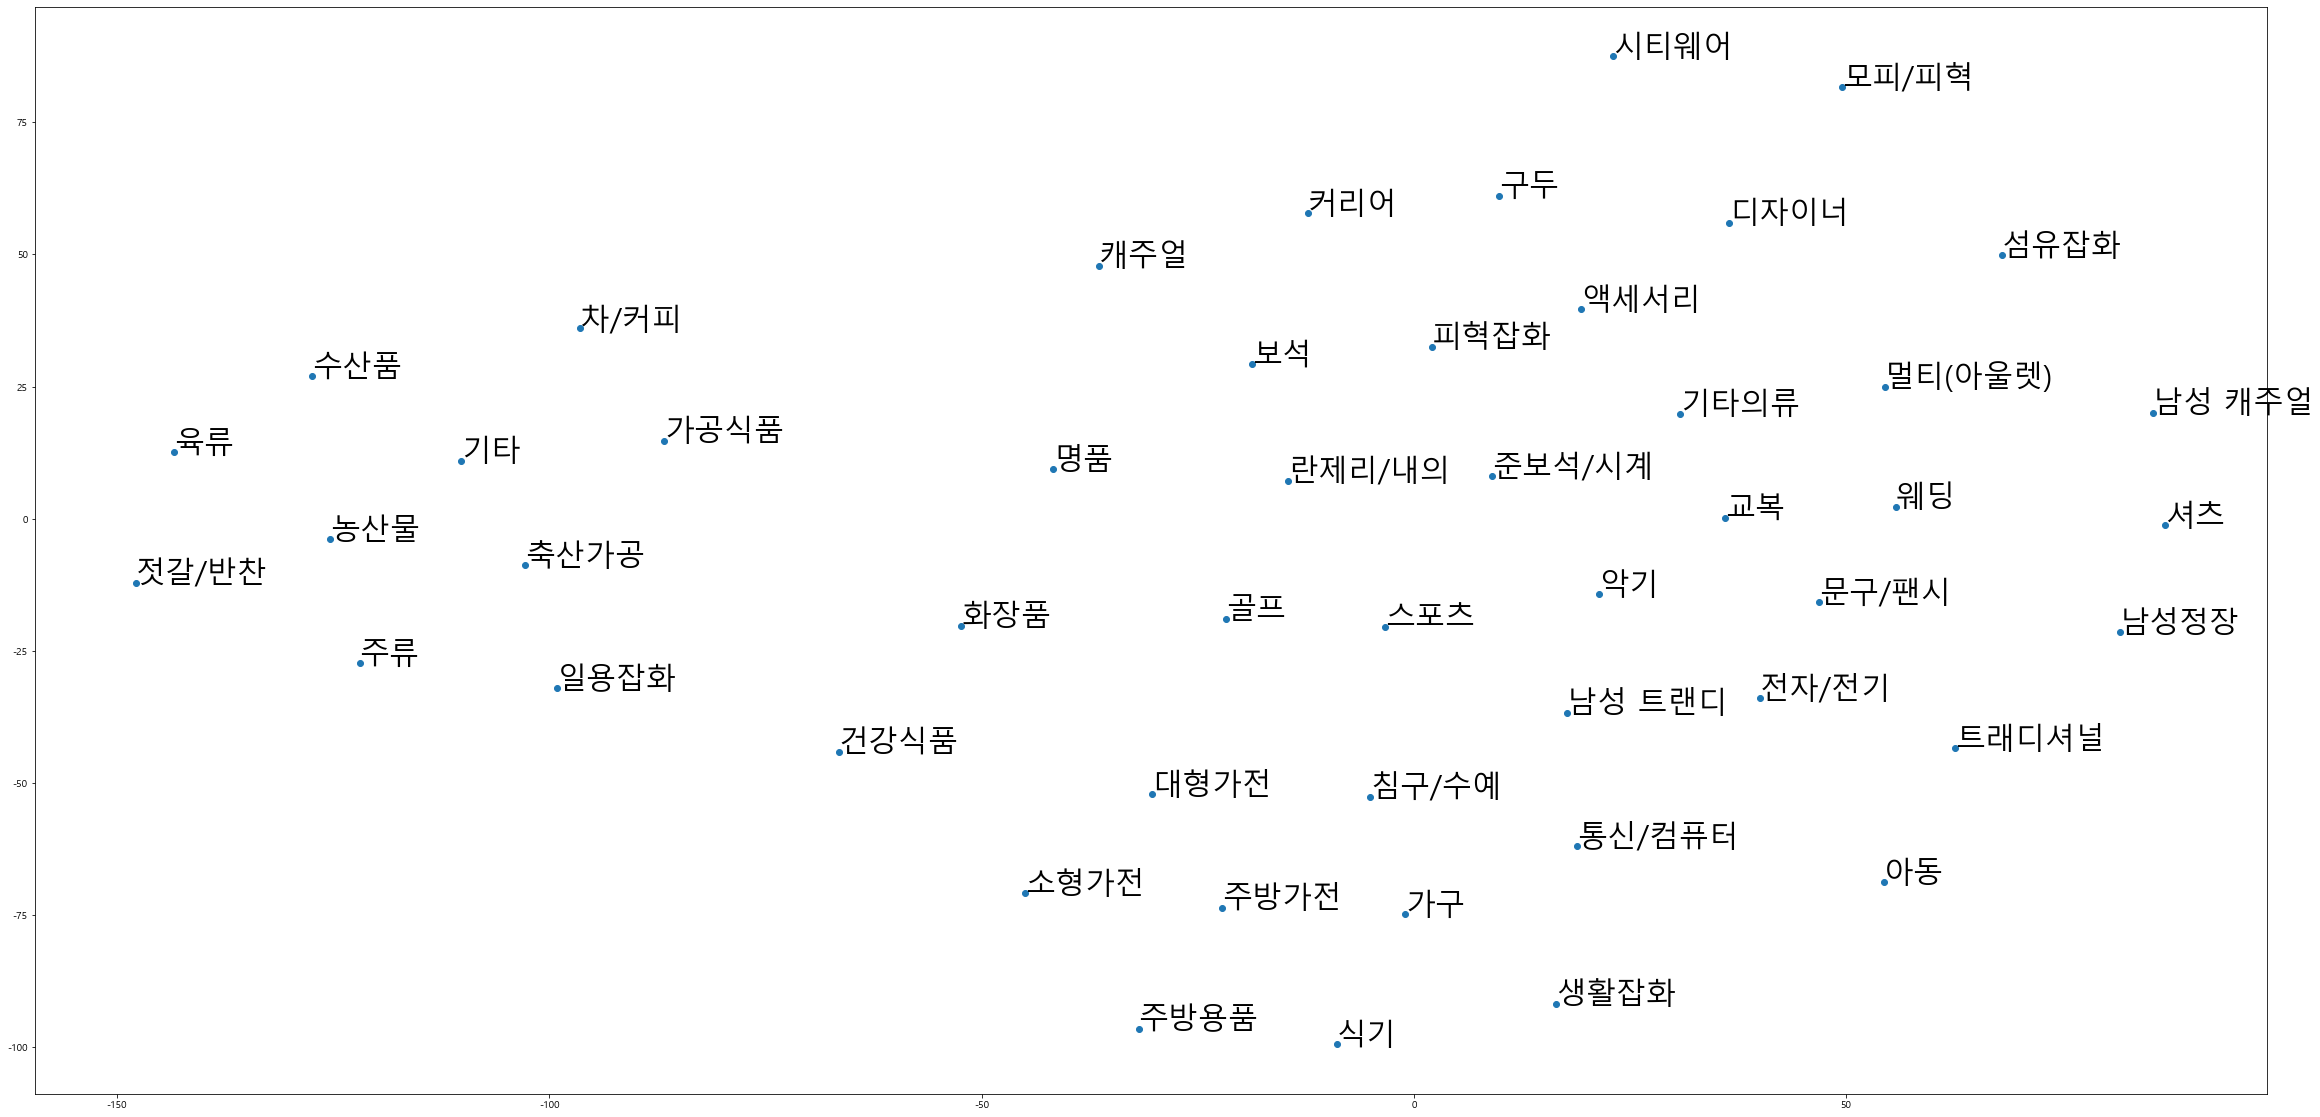

In [178]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

kind = "gds_grp_mclas_nm" # 분석대상 문자 데이타 컬럼

# 학습을 하기 위한 고객별로 구매한 상품목록 생성
goods_name_list = []
for id in tr["cust_id"].unique():
    goods_name_list.append(list(tr.query("cust_id == @id")[kind].values))
goods_name_list[:3]  # 일단 3개만 보자..

# 모델학습을 위한 초기 값
max_features = 300 # 문자 벡터 차원 수
min_word_count = 1 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 5 # 문자열 창 크기, 학습 윈도우(인접한 단어 리스트) 크기
downsampling = 1e-3 # 문자 빈도수 Downsample

# 모델 학습
model = word2vec.Word2Vec(goods_name_list, workers=num_workers, size=max_features, min_count=min_word_count, window=context, sample=downsampling)

# 필요없는 메모리 unload
model.init_sims(replace=True)

# 모델 정보 확인
word_vectors_keys = model.wv.vocab.keys()
word_vectors_keys

# "화장품" 과 가장 유사한 10개 데이타 추출
model.most_similar(positive=["화장품"], topn=10)

# Word2Vec으로 벡터화 한 단어를 t-SNE 시각화 과정 시작
mpl.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 폰트 깨지지 않도록
vocab = list(model.wv.vocab); display(vocab)  
X = model[vocab]; len(X)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# 단어별 좌표를 데이타프레임으로 생성
df_word = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y']); df_word.head(10)

# 시각화
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_word['x'], df_word['y'])
for word, pos in df_word.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

**[미완성-데이타정제]** "상품군미지정", "기타" 를 정상적인 값으로 변경하기 위한 처리는 생략

In [207]:
# ["goods_id", "gds_grp_nm", "gds_grp_mclas_nm"] 그룹
# "상품군미지정" 을 찾아 같은 goods_id의 "상품군미지정"이 아닌 값으로 수정
# "기타" 를 찾아 같은 goods_id의 "기타"가 아닌 값으로 수정
tr_tmp = tr.copy()
df = tr_tmp.groupby(["goods_id", "gds_grp_nm", "gds_grp_mclas_nm"]).size(); df
df = df.reset_index(); df

,goods_id,gds_grp_nm,gds_grp_mclas_nm,0
0,5101,상품군미지정,기타,31
1,5101,햄,축산가공,31
2,5104,상품군미지정,기타,70
3,5104,햄,축산가공,70
4,5109,햄,축산가공,2
...,...,...,...,...
4399,997100,상품군미지정,기타,4
4400,997102,공병,주류,4
4401,997110,공병,주류,7
4402,997120,공병,주류,146


In [180]:
display(features)
features.to_csv('features.csv', index=False, encoding='cp949')
features.info()

,cust_id,평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,구매추이,최초구매일,최종구매일,거래기간,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,주간구매패턴,주구매계절,주구매요일,중순,초순,하순,월중최고금액구분,고가구매율,BEST10구매금액,BEST10구매건수,BEST10구매여부,휴면이탈여부
0,0,2.028571,4.174602e+06,3.944444,1150.0,179000.0,68.0,1.304888e+06,7.100000,10.0,2007-10,2007-10,0513-0810-1028-0609-1009-1215-0330-1208-0708-1004-1105-0908,20070119,20071224,339.0,2,1.647059,0.086420,0.346939,0.0,가을,토,24960560.0,36760740.0,13421540.0,초순,0.000000,48162500.0,20.0,True,정상
1,1,1.000000,1.218000e+06,1.000000,300000.0,1218000.0,2.0,1.218000e+06,2.000000,1.0,2007-10,2007-10,1025-1022,20071022,20071025,3.0,1,1.000000,0.006173,0.040816,1.0,가을,월,0.0,0.0,2436000.0,하순,0.000000,0.0,0.0,False,정상
2,2,4.000000,1.598500e+06,2.000000,64500.0,746750.0,4.0,7.992500e+05,4.000000,1.0,2007-01,2007-01,0108-0110,20070108,20070110,2.0,1,1.000000,0.006173,0.040816,1.0,겨울,월,0.0,3197000.0,0.0,초순,0.000000,0.0,0.0,False,휴면이탈
3,3,1.833333,8.932011e+05,2.444444,1800.0,76780.0,44.0,4.037379e+05,4.400000,10.0,2007-06,2007-03,0610-0222-0413-0307-0417-0331-0410-0911-1206-0515-0709-0503,20070213,20071214,304.0,1,1.538462,0.061728,0.265306,1.0,봄,화,3075960.0,7242220.0,5759440.0,초순,0.000000,950400.0,1.0,True,정상
4,4,1.500000,1.452500e+07,1.500000,2050000.0,3000000.0,3.0,7.775000e+06,1.500000,2.0,2007-11,2007-11,1114-0528,20070528,20071114,170.0,1,1.000000,0.009259,0.061224,1.0,가을,수,27000000.0,0.0,2050000.0,중순,0.000000,2050000.0,1.0,True,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,2.000000,3.175200e+06,2.000000,132300.0,1587600.0,2.0,1.587600e+06,2.000000,1.0,2007-06,2007-06,0624,20070624,20070624,0.0,1,1.000000,0.006173,0.040816,0.0,여름,일,0.0,0.0,3175200.0,하순,0.000000,3042900.0,1.0,True,휴면이탈
3496,3496,1.333333,5.096886e+06,1.714286,2500.0,2389800.0,12.0,3.923872e+06,2.000000,6.0,2007-10,2007-12,1006-0202-1220-0811-0312-0911-1201,20070202,20071220,321.0,1,1.400000,0.021605,0.102041,1.0,가을,토,17096600.0,18581600.0,0.0,초순,0.000000,26000500.0,9.0,True,정상
3497,3497,1.000000,7.500000e+04,1.000000,75000.0,75000.0,1.0,7.500000e+04,1.000000,1.0,2007-01,2007-01,0102,20070102,20070102,0.0,1,1.000000,0.003086,0.020408,1.0,겨울,화,0.0,75000.0,0.0,초순,0.000000,0.0,0.0,False,휴면이탈
3498,3498,2.000000,9.375000e+05,1.000000,875000.0,937500.0,2.0,9.375000e+05,1.000000,2.0,2007-04,2007-01,0405-0116,20070116,20070405,79.0,1,1.000000,0.003086,0.020408,1.0,봄,화,875000.0,1000000.0,0.0,초순,0.000000,1875000.0,2.0,True,휴면이탈


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cust_id     3500 non-null   int64  
 1   평균구매상품수     3499 non-null   float64
 2   일평균구매액      3499 non-null   float64
 3   일평균구매건      3499 non-null   float64
 4   최소구매액       3499 non-null   float64
 5   중간구매액       3499 non-null   float64
 6   주거래지점거래수    3499 non-null   float64
 7   월평균구매금액     3499 non-null   float64
 8   월평균구매건수     3499 non-null   float64
 9   거래개월수       3499 non-null   float64
 10  최고구매월       3499 non-null   object 
 11  최다구매월       3499 non-null   object 
 12  구매추이        3499 non-null   object 
 13  최초구매일       3499 non-null   object 
 14  최종구매일       3499 non-null   object 
 15  거래기간        3499 non-null   float64
 16  지점단골성향도     3500 non-null   int64  
 17  브랜드단골성향도    3500 non-null   float64
 18  구매상품군다양성    3500 non-null   float64
 19  구매브랜드다양성    3500 non-null  